### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** `Kasturi Deshpande`
<br>
**Student ID(s):** `1127409`



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [14]:
import csv
import numpy as np
import scipy as sp
import pandas as pd
import math 
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(filename):

    data = pd.read_csv(filename)

    train_data, test_data = train_test_split(data, test_size = 0.10, shuffle = False)

    return train_data, test_data

In [16]:
def lessthan(df_lessthan, numeric_att):
        numeric = {}
        nominal = {}
        
        for cols in df_lessthan.columns[0:-1]:
            if cols not in numeric_att:
                likelihood = (df_lessthan.groupby(cols).size())/len(df_lessthan)
                nominal[cols] = likelihood
            else:
                mean = df_lessthan[cols].mean()
                sd = df_lessthan[cols].std()
                numeric[cols] = ([mean, sd])
                
        return numeric, nominal
            

In [17]:
def morethan(df_morethan, numeric_att):
        numeric = {}
        nominal = {}
        
        for cols in df_morethan.columns[0:-1]:
            if cols not in numeric_att:
                likelihood = (df_morethan.groupby(cols).size())/len(df_morethan)
                nominal[cols] = likelihood
            else:
                mean = df_morethan[cols].mean()
                sd = df_morethan[cols].std()
                numeric[cols] = ([mean, sd])
           
        return numeric, nominal

In [18]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model

def train(train_data, test_data):    
    
    prior = {}
    
    posterior_lessthan_nom = {}
    posterior_greaterthan_nom = {}
    posterior_lessthan_num = {}
    posterior_greaterthan_num = {}
    
    
    file = pd.read_csv(filename)
    
    y_actual = test_data['label']
    test_data = test_data.iloc[:,:-1]
   
   
    prior_prob = (train_data.groupby('label').size())/len(train_data)
    
    prior[' <=50K'] = prior_prob[0]
    prior[' >50K'] = prior_prob[1]
    
    
    df_lessthan = train_data.loc[train_data['label'] == ' <=50K']
    df_morethan = train_data.loc[train_data['label'] == ' >50K']

    
    numeric_att = ['age', 'education num', 'hours per week']
   
    #calculting the probabilities of numerical and nominal variables
    posterior_lessthan_num, posterior_lessthan_nom = lessthan(df_lessthan, numeric_att)
    posterior_greaterthan_num, posterior_greaterthan_nom = morethan(df_morethan, numeric_att)
    
    return df_lessthan, df_morethan, y_actual, test_data, prior_prob, posterior_lessthan_nom, posterior_greaterthan_nom, posterior_lessthan_num, posterior_greaterthan_num
    

In [19]:
def gaussian_prob(value, mean, sd):
    
    denom = 1/(sd*math.sqrt(2*math.pi))
    num = math.exp((-1/2)*(((value - mean)/sd)**2))

    gaussian = denom * num
    
    return gaussian

In [20]:
# This function should predict classes for new items in the testing data
def predict(y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num):
    
    
    numeric_att = ['age', 'education num', 'hours per week']
    nominal_att = [att for att in test_data.columns if att not in numeric_att]
    
    y_pred = []
    
     
    total_lessthan = 0
    total_morethan = 0
    
   
    
        
    for i in test_data.index:
        for col in numeric_att:
            total_lessthan += math.log(gaussian_prob(test_data[col][i], lessthan_num[col][0], lessthan_num[col][1]))
            total_morethan += math.log(gaussian_prob(test_data[col][i], greaterthan_num[col][0], greaterthan_num[col][1]))

                
        for cols in nominal_att:

            val_1 = lessthan_nom[cols]
            
            if np.finfo('float64').eps < (1/len(df_lessthan)):
                epsilon_less = np.finfo('float64').eps
            else:
                epsilon_less = 0
                
            if test_data[cols][i] in (df_lessthan.groupby([cols]).size()).index:
                vals_1 = val_1[test_data[cols][i]]
                total_lessthan += math.log(vals_1)
            else:
                #prob_less = np.finfo('float64').eps
                total_lessthan += math.log(epsilon_less)
                
                
            if np.finfo('float64').eps < (1/len(df_morethan)):
                epsilon_more = np.finfo('float64').eps
            else:
                epsilon_more = 0

            val_2 = greaterthan_nom[cols]

            if test_data[cols][i] in (df_morethan.groupby([cols]).size()).index:
                vals_2 = val_2[test_data[cols][i]]
                total_morethan += math.log(vals_2)
            else:
                #prob_more = np.finfo('float64').eps
                total_morethan += math.log(epsilon_more)

        final_lessthan = math.log(prior_prob[0]) + total_lessthan
        final_morethan = math.log(prior_prob[1]) + total_morethan

        y_pred.append([final_lessthan, final_morethan])


        total_lessthan = 0
        total_morethan = 0
    
 
    predicted_class = []
    
    for row in y_pred:
        if row[0]<row[1]:
            predicted_class.append('>50K')
        elif row[0]>row[1]:
            predicted_class.append('<=50K')
    return y_pred, predicted_class, y_actual

In [116]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(y_hat, clas, y_actual):

    y = [rows for rows in y_actual]

    labels = [' <=50K', ' >50K']
    labels_2 = ['<=50K', '>50K']
 
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(clas)): 
    
        if ((clas[i])==(labels_2[0]) and (y[i]==labels[0])):
            TP += 1
        if ((clas[i])==(labels_2[1]) and (y[i]==labels[1])):
            TN += 1
        if ((y[i])==(labels[1]) and (clas[i]==labels_2[0])):
            FP += 1
        if (((y[i])==(labels[0]) and (clas[i]==labels_2[1]))):
            FN += 1
    
    
    accuracy = (TP+TN)/len(y_hat)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F1score = (2*precision*sensitivity)/(sensitivity + precision)
    
    
    confusion_matrix = ([[TP, FN], [FP, TN]])
 
    return confusion_matrix, accuracy, F1score

In [115]:

# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]


# First, read in the data and apply your NB model to the ADULT data
filename = 'adult.csv'

train_data, test_data = preprocess(filename)

df_lessthan, df_morethan, y_actual, test_data, prior_prob, posterior_lessthan_nom, posterior_greaterthan_nom, posterior_lessthan_num, posterior_greaterthan_num = train(train_data, test_data)

y_pred, predicted_class, y_actual = predict(y_actual, test_data, prior_prob, posterior_lessthan_nom, posterior_greaterthan_nom, posterior_lessthan_num, posterior_greaterthan_num)
# Second, print the full evaluation results from the evaluate() function

confusion_matrix, accuracy, F1score = evaluate(y_pred, predicted_class, y_actual)

print('Accuracy: ', accuracy)
print('\n')
print('Confusion Matrix:\n')
c = (['Positive',confusion_matrix[0][0], confusion_matrix[1][0]], ['Negative',confusion_matrix[0][1], confusion_matrix[1][1]])
matrix = pd.DataFrame(c, columns = [' ', 'Positive', 'Negative'], index = None)
print(matrix.to_string(index=False))
print('\n')
print('F1score: ', F1score)
print('\n')


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Attribute vectors of instances [0, 1, 2]: ", train_data.loc[[0]].to_numpy(), train_data.loc[[1]].to_numpy(), train_data.loc[[2]].to_numpy()) # of the first three records in adult.csv

print("\nNumber of instances (N): ", len(test_data) +len(train_data) )
print("Number of attributes (F): ", len(test_data.columns) )
print("Number of labels (L): ", len(set(predicted_class)))


# print out the prediction results of the last three instances
print("\n\nPredicted class log-probabilities for instance N-3: ", y_pred[len(y_pred)-3])
print("Predicted class ID for instance N-3: ", predicted_class[len(predicted_class)-3] )
print("\nPredicted class log-probabilities for instance N-2: ", y_pred[len(y_pred)-2])
print("Predicted class ID for instance N-2: ",predicted_class[len(predicted_class)-2] )
print("\nPredicted class log-probabilities for instance N-1: ", y_pred[len(y_pred)-1])
print("Predicted class ID for instance N-1: ", predicted_class[len(predicted_class)-1])



Accuracy:  0.86


Confusion Matrix:

          Positive  Negative
Positive        69         6
Negative         8        17


F1score:  0.9078947368421053


Attribute vectors of instances [0, 1, 2]:  [[68 ' ?' ' 1st-4th' 2 ' Divorced' ' ?' ' Not-in-family' ' White'
  ' Female' 20 ' United-States' ' <=50K']] [[39 ' State-gov' ' Bachelors' 13 ' Never-married' ' Adm-clerical'
  ' Not-in-family' ' White' ' Male' 40 ' United-States' ' <=50K']] [[50 ' Self-emp-not-inc' ' Bachelors' 13 ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' 13 ' United-States'
  ' <=50K']]

Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class log-probabilities for instance N-3:  [-20.71689698193305, -19.556273652832147]
Predicted class ID for instance N-3:  >50K

Predicted class log-probabilities for instance N-2:  [-25.33907063773019, -22.744589775643146]
Predicted class ID for instance N-2:  >50K

Predicted class log-probabilities for instanc

## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [39]:
#Calculting sensitivity and specificity

TP = confusion_matrix[0][0]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)

Sensitivity:  0.8961038961038961
Specificity:  0.7391304347826086


Provide your text answer of 150-200 words in this cell.

## Answer: Question 1

### Model details:

 * The orginal dataset was split into training and testing sets (90 -10) split.
 * Gaussian distribution was used for the conditional probabilities of numeric values.
 * Strictly positive and very small constant - epsilon is used for the test values which have a conditional probability of zero. 
 
 
The evaluated model is 90% sensitive and 74% specific. The higher value of sensitivity suggests that this model is better at predicting true positive cases than predicting true nagative cases. There is approximately 16% difference between the two in this model. The training dataset has 900 values split according to the class labels as shown below - 
 
```        
          Total count
label        
 <=50K    692
 >50K     208
 ```
The above table shows that only 30% of the training values belong to the negative class label showing a bias towards the positive class. This suggests that the lower specificity is caused by the lower amount of negative class values in the training dataset (i.e. the model is learning a smaller number of negative class instances and hence is not able to classify all the negative values in the test dataset). 

The model performance can be improved by - 
   * Changing the train-test split to 70-30 or a ratio which gives more training values since the current dataset       is quite small for a 90-10 split
   * Using a more balanced dataset
   * Removing the correlated features
   * Handling text-data by applying cleaning techniques such as stemming, lemmatization
 

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [107]:
#Question 2 part a

def KDE_gaussian(testvalue, df, col, kernel_bandwidth):
    
    total = 0
    
    for value in df[col]:
        total += gaussian_prob(testvalue, value, kernel_bandwidth)
   
    return ((1/len(df))*total)

In [108]:
def predict_with_KDE(df_lessthan, df_morethan, sigma, y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num):
    
    
    numeric_att = ['age', 'education num', 'hours per week']
    nominal_att = [att for att in test_data.columns if att not in numeric_att]
    
    
    y_pred = []
    
     
    total_lessthan = 0
    total_morethan = 0
    
  

    for i in test_data.index:
        
        for col in numeric_att:
            
            total_lessthan += math.log(KDE_gaussian(test_data[col][i], df_lessthan, col, sigma))
            total_morethan += math.log(KDE_gaussian(test_data[col][i], df_morethan, col, sigma))
        
        for cols in nominal_att:

            val_1 = lessthan_nom[cols]
            
            if np.finfo('float64').eps < (1/len(df_lessthan)):
                epsilon_less = np.finfo('float64').eps
            else:
                epsilon_less = 0
                
            if test_data[cols][i] in (df_lessthan.groupby([cols]).size()).index:
                vals_1 = val_1[test_data[cols][i]]
                total_lessthan += math.log(vals_1)
            else:
                #prob_less = np.finfo('float64').eps
                total_lessthan += math.log(epsilon_less)
                
                
            if np.finfo('float64').eps < (1/len(df_morethan)):
                epsilon_more = np.finfo('float64').eps
            else:
                epsilon_more = 0

            val_2 = greaterthan_nom[cols]

            if test_data[cols][i] in (df_morethan.groupby([cols]).size()).index:
                vals_2 = val_2[test_data[cols][i]]
                total_morethan += math.log(vals_2)
            else:
                #prob_more = np.finfo('float64').eps
                total_morethan += math.log(epsilon_more)

        final_lessthan = math.log(prior_prob[0]) + total_lessthan
        final_morethan = math.log(prior_prob[1]) + total_morethan

        y_pred.append([final_lessthan, final_morethan])


        total_lessthan = 0
        total_morethan = 0
 
    predicted_class = []
    for row in y_pred:
        if row[0]<row[1]:
            predicted_class.append('>50K')
        elif row[0]>row[1]:
            predicted_class.append('<=50K')
    return y_pred, predicted_class, y_actual

In [110]:
def bandwidth_selection(df_lessthan, df_morethan, y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num):
    

    bandwidth = [3,5,7,9,15]
    max_accuracy = {}
    maxval = 0
    band = 0
    for val in bandwidth:
        y_pred, predicted_class, y_actual = predict_with_KDE(df_lessthan, df_morethan, val, y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num)
        confusion_matrix, accuracy, F1score = evaluate(y_pred, predicted_class, y_actual)
        max_accuracy[str(accuracy)] = [F1score, confusion_matrix]
        if maxval == 0:
            maxval = accuracy
            band = val
        elif accuracy > maxval:
            maxval = accuracy
            band = val
            
        print(f" Bandwidth: {val}, Accuracy: {accuracy}, F1score: {F1score}")
        
    print(f" KDE bandwidth: {band}, Max Accuracy: {maxval}, F1score: {max_accuracy[str(maxval)][0]}")
    #return sort(max_accuracy[0])
        

In [111]:
filename = 'adult.csv'

train_data, test_data = preprocess(filename)

df_lessthan, df_greaterthan, y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num = train(train_data, test_data)

bandwidth_selection(df_lessthan, df_greaterthan, y_actual, test_data, prior_prob, lessthan_nom, greaterthan_nom, lessthan_num, greaterthan_num)


#print(f" Mean for less than: {lessthan_num}, SD: {lessthan_num}, '\n', Mean for greater than: {greaterthan_num}, SD: {greaterthan_num}")

 Bandwidth: 3, Accuracy: 0.86, F1score: 0.9066666666666665
 Bandwidth: 5, Accuracy: 0.81, F1score: 0.8689655172413794
 Bandwidth: 7, Accuracy: 0.82, F1score: 0.8767123287671235
 Bandwidth: 9, Accuracy: 0.83, F1score: 0.8827586206896552
 Bandwidth: 15, Accuracy: 0.83, F1score: 0.8827586206896552
 KDE bandwidth: 3, Max Accuracy: 0.86, F1score: 0.9066666666666665


## Answer: Question 2 part a

For the current model - 

 * Accuracy without KDE = 86%
 * Accuracy with KDE = 86%

The current dataset (adult.csv) contains 3 numerical variables and 8 categorical variables. Looking at the plots of these columns - 


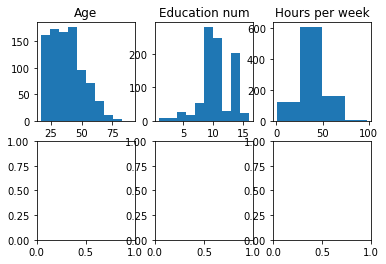

In [98]:
train_data, test_data = preprocess('adult.csv')
  
figure, axis = plt.subplots(2, 3)
  
axis[0, 0].hist(train_data['age'])
axis[0, 0].set_title("Age")

axis[0, 1].hist(train_data['education num'])
axis[0, 1].set_title("Education num")
  
axis[0, 2].hist(train_data['hours per week'], bins=4)
axis[0, 2].set_title("Hours per week")

plt.savefig('Train data.png')

This shows that the numerical columns in the training dataset do not follow a normal distribution except 'Hours of week' which is closer to a Gaussian distribution. But as the number of numerical attributes is only 3 compared to the 8 nominal attributes, this impact is not significant as the log of the probabilities lie between 0-1.

For without KDE evalutation, the model loops through a few values for the selection of the kernel bandwidth. In the end the kernel bandwidth with the highest accuracy has been selected. Again just as the Gaussian model,the model takes log of the probabilities; the smaller number of numerical attributes compared to the much larger number of nominal attributes do not impact significantly on the model evaluation resulting into similar accuracies for the with and without KDE evaluations. 

Hence both the methods are suitable for the model as they are resulting in the same accuracies. 

In [120]:
#Question 2 part b

filename = 'adult.csv'

data = pd.read_csv(filename)
#print(data)
dat1 = np.array(data)
#print(dat1)

total_accuracy = 0
total_recall = 0
total_sensitivity = 0
total_specificity = 0

folds = [2, 10]

for fold in folds:
    
    kfold = KFold(n_splits = fold, random_state=None, shuffle=False)

    for trainset, test in kfold.split(data):

        train_data = pd.DataFrame(dat1[trainset], columns = [cols for cols in data.columns])
        test_data = pd.DataFrame(dat1[test], columns = [cols for cols in data.columns])
        #print('train: %s, test: %s' % (train_data, test_data))
        #print(test_data.dtypes)

        df_lessthan, df_morethan, y_actual, test_data, prior_prob, posterior_lessthan_nom, posterior_greaterthan_nom, posterior_lessthan_num, posterior_greaterthan_num = train(train_data, test_data)

        y_pred, predicted_class, y_actual = predict(y_actual, test_data, prior_prob, posterior_lessthan_nom, posterior_greaterthan_nom, posterior_lessthan_num, posterior_greaterthan_num)


        confusion_matrix, accuracy, F1score = evaluate(y_pred, predicted_class, y_actual)

        total_recall += confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
        total_accuracy += accuracy
        total_sensitivity += confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
        total_specificity += confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
        
    print('k-folds = ', fold)
    print('Average accuracy = ', total_accuracy/fold)
    print('Average recall = ', total_recall/fold)
    print('Average senstivity = ', total_sensitivity/fold)
    print('Average Specificity = ', total_specificity/fold)
    print('\n')
    
    total_accuracy = 0
    total_recall = 0
    total_sensitivity = 0
    total_specificity = 0
    

k-folds =  2
Average accuracy =  0.817
Average recall =  0.8518507244612201
Average senstivity =  0.8518507244612201
Average Specificity =  0.7027523623818809


k-folds =  10
Average accuracy =  0.8119999999999999
Average recall =  0.8422969053304696
Average senstivity =  0.8422969053304696
Average Specificity =  0.7127698935525022




## Answer: Question 2 part b

Following are the results from the cross-validations - 
 * 2-fold: Accuracy = 82%, Recall = 85%, Specificity = 70%
 * 10-fold: Accuracy = 81%, Recall = 84%, Specificity = 71%
 
Looking at these metrics, it can be seen that the 2-fold model performs better in predicting the true positive cases whereas the 10-fold performs slightly better at prediciting the true negative cases. 

Overall, both the models perform similarly starting that for this dataset the size of the m-fold is sufficient at both m=2 and m=10 suggesting that both type of folds are providing enough data for the model to train and test. 

 

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [6]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Kasturi Deshpande, 1127409]
   
   <b>Dated</b>: [08/04/2022]